# Block 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

Saving messed_up_iris.xlsx to messed_up_iris (3).xlsx


{'messed_up_iris.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00B;>\xc9\\\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

# Block 2

In [2]:
# Load data file
read_file = pd.read_excel('messed_up_iris.xlsx')
read_file.to_csv('messed_up_iris.csv')                                   # Write into csv file
df = pd.DataFrame(pd.read_csv('messed_up_iris.csv',delimiter=',',index_col=0))
df.drop(columns='Unnamed: 0.1',inplace=True)                             # drop column  
# show the shape and head dataframe
print('Shape of data:',df.shape)
print('\n')
df.head()

Shape of data: (150, 7)




,sepal_length,sepal_width,petal_length,petal_width,species,color,origin
0,5.1,3.5,1.4,0.2,setosa,green,usa
1,4.9,3.0,1.4,0.2,setosa,yellow,usa
2,4.7,3.2,1.3,0.2,setosa,green,usa
3,4.6,3.1,1.5,0.2,setosa,orange,japan
4,5.0,3.6,1.4,0.2,setosa,blue,europe


# Block 3

In [3]:
df = df.drop(['color'],axis=1)        # remove column that has more than 50% of the data missing
df = df.dropna(thresh = 4)            # remove rows that has more than 50% of the data missing
print('shape of data:', df.shape)

shape of data: (145, 6)


# Block 4

In [4]:
df[df.duplicated()]                                 # Check for any duplicates
df = df.drop_duplicates(ignore_index=True)          # Drop duplicates
any(df.duplicated())                                # Double check to make sure none are left
print('shape of data:',df.shape)

shape of data: (140, 6)


# Block 5 

In [5]:
# For origin column

# Fixing the spelling errors
df['origin'] = np.where(df['origin']=='uas','usa',df['origin'])
df['origin'] = np.where(df['origin']=='euarope','europe',df['origin'])
df['origin'] = np.where(df['origin']=='europe origin','europe',df['origin'])

origin_df = pd.get_dummies(df['origin'],drop_first=True)        # Convert into numerical values and drop the first column to make it more efficient

# For species column

# Fixing the spelling errors
df['species'] = np.where(df['species']=='seotsa','setosa',df['species'])
df['species'] = np.where(df['species']=='versicolr','versicolor',df['species'])
df['species'] = np.where(df['species']=='west virginia','virginica',df['species'])
df['species'] = np.where(df['species']=='virginia','virginica',df['species'])

species_df = pd.get_dummies(df['species'],drop_first=True)     # Convert into numerical values and drop the first column to make it more efficient

print('head of the data for origin_df')
print(origin_df.head())
print('\n')
print('head of the data for species_df')
print(species_df.head())

head of the data for origin_df
   japan  usa
0      0    1
1      0    1
2      0    1
3      1    0
4      0    0


head of the data for species_df
   versicolor  virginica
0           0          0
1           0          0
2           0          0
3           0          0
4           0          0


# Block 6

In [6]:
final_df = pd.concat([df,origin_df,species_df],axis=1)      # Concatenate columns together 
final_df.drop(columns='species',inplace=True)               # Drop redundant columns 
final_df.drop(columns='origin',inplace=True)              
final_df.head()

,sepal_length,sepal_width,petal_length,petal_width,japan,usa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0,0
4,5.0,3.6,1.4,0.2,0,0,0,0


# Block 7

In [7]:
upper_sd = final_df.mean()+2*final_df.std()                               # Creating thresholds for standard deviation
lower_sd = final_df.mean()-2*final_df.std()
final_df = final_df[(final_df < upper_sd) & (final_df > lower_sd)]        # Remove outliers above 2 standard deviations
print('shape of data:', final_df.shape)

shape of data: (140, 8)


# Block 8

In [8]:
final_df = final_df.fillna(final_df.median())                         # replace missing data with the median value

# Block 10

AxesSubplot(0.125,0.125;0.62x0.755)


,sepal_length,sepal_width,petal_length,petal_width,japan,usa,versicolor,virginica
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.872143,3.057857,3.790000,1.209286,0.300000,0.364286,0.307143,0.350000
std,0.791508,0.431505,1.718134,0.757590,0.459903,0.482957,0.462966,0.478682
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,5.200000,2.800000,1.575000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000,1.000000


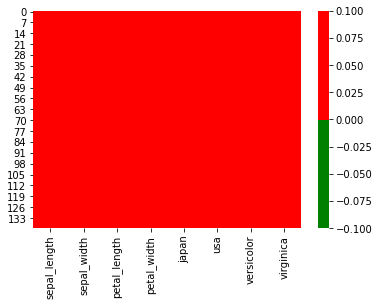

In [9]:
print(sns.heatmap(final_df.isnull(),cmap=['Green','Red']))            # Show that there is no missing data

final_df.describe()